In [2]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv("Assignment_Dataset_Brandintelle_Final_Data.csv",parse_dates=['DATE'], index_col=['DATE'])

In [8]:
print('Shape of data', df.shape)
df.head()

Shape of data (208, 11)


,Sr No,Sales,TV_Spends,OOH_Spends,Print_Spends,FB_Spends,FB_Impressions,Search_Spends,Paid_Search_Clicks,competitor_sales_B,events
DATE,,,,,,,,,,,
2015-11-23,1,2754371,167687,0,95463,228213,72903852,0,0,8125009,na
2015-11-30,2,2584276,214600,0,0,34258,16581099,31000,29511,7901549,na
2015-12-07,3,2547386,0,248022,3404,127691,49954773,28400,36132,8300197,event0
2015-12-14,4,2875220,625877,0,132600,84014,31649297,31900,36804,8122883,na
2015-12-21,5,2215953,0,520005,0,20687,8802269,27100,28401,7105985,na


<AxesSubplot:xlabel='DATE'>

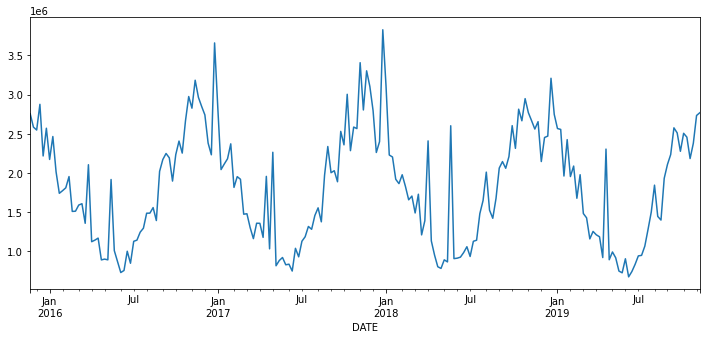

In [9]:
df['Sales'].plot(figsize=(12,5))

### Check For Stationarity 

In [11]:
from statsmodels.tsa.stattools import adfuller

df_test = adfuller(df['Sales'], autolag = 'AIC')

print("1. ADF : ",df_test[0])
print("2. P-Value : ",df_test[1])
print("3. Num of Lags : ",df_test[2])
print("4. Num of Observations Used For ADF Regrestion and Critical Values Calculation : ",df_test[3])
print("5. Critical Values : ")
for key, val in df_test[4].items():
    print("\t",key, ": ", val)

# ADF = Augmented Dickey Fuller Test

1. ADF :  -5.736818696706658
2. P-Value :  6.409857208353513e-07
3. Num of Lags :  14
4. Num of Observations Used For ADF Regrestion and Critical Values Calculation :  193
5. Critical Values : 
	 1% :  -3.4646940755442612
	 5% :  -2.8766348847254934
	 10% :  -2.5748163958763994


### Figure Out Order for ARIMA Model

In [16]:
from pmdarima import auto_arima
# Ignore harmless warning
import warnings
warnings.filterwarnings("ignore")

In [18]:
stepwise_fit = auto_arima(df['Sales'], trace = True,
                        suppress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=5964.595, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=6201.686, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5990.414, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=6122.131, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6618.886, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=5964.291, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=6088.750, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5964.631, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=5965.787, Time=0.11 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=6082.973, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5963.643, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=5963.911, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=5965.222, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=5963.563, Time=0.09 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  208
Model:               SARIMAX(3, 0, 0)   Log Likelihood               -2976.782
Date:                Tue, 25 Apr 2023   AIC                           5963.563
Time:                        13:03:04   BIC                           5980.251
Sample:                    11-23-2015   HQIC                          5970.311
                         - 11-11-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.058e+05   8.36e+04      2.460      0.014    4.18e+04     3.7e+05
ar.L1          0.4804      0.058      8.219      0.000       0.366       0.595
ar.L2          0.3054      0.052      5.835      0.000       0.203       0.408
ar.L3          0.1069      0.061      1.750      0.080      -0.013       0.227
sigma2       1.58e+11      0.220   7.19e+11      0.000    1.58e+11    1.58e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                79.72
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.87
Prob(H) (two-sided):                  0.50   Kurtosis:                         5.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.01e+27. Standard errors may be unstable.
"""

In [41]:
from statsmodels.tsa.arima.model import ARIMA

In [42]:
print(df.shape)
train = df.iloc[:-12]
test = df.iloc[-12:]
print(train.shape,test.shape)

(208, 11)
(196, 11) (12, 11)


### Train the Model

In [43]:
model = ARIMA(train['Sales'],order = (3,0,0))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  196
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -2807.644
Date:                Tue, 25 Apr 2023   AIC                           5625.288
Time:                        13:45:35   BIC                           5641.678
Sample:                    11-23-2015   HQIC                          5631.923
                         - 08-19-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.788e+06   2.32e+05      7.703      0.000    1.33e+06    2.24e+06
ar.L1          0.4648      0.062      7.556      0.000       0.344       0.585
ar.L2          0.3144      0.054      5.789      0.000       0.208       0.421
ar.L3          0.1064      0.064      1.666      0.096      -0.019       0.232
sigma2       1.62e+11      2.296   7.05e+10      0.000    1.62e+11    1.62e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                83.60
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             0.96
Prob(H) (two-sided):                  0.67   Kurtosis:                         5.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.1e+36. Standard errors may be unstable.
"""

In [47]:
start = len(train)
end = len(train)+len(test)-1
pred = result.predict(start=start,end=end,typ='levels')
print(pred)

2019-08-26    1.504050e+06
2019-09-02    1.496540e+06
2019-09-09    1.521643e+06
2019-09-16    1.542293e+06
2019-09-23    1.558984e+06
2019-09-30    1.575905e+06
2019-10-07    1.591215e+06
2019-10-14    1.605427e+06
2019-10-21    1.618647e+06
2019-10-28    1.630889e+06
2019-11-04    1.642247e+06
2019-11-11    1.652782e+06
Freq: W-MON, Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='DATE'>

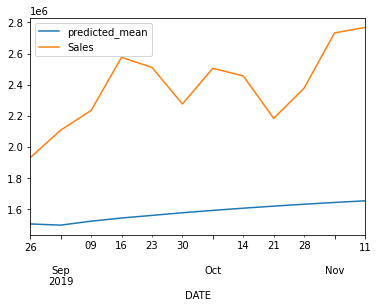

In [48]:
pred.plot(legend=True)
test['Sales'].plot(legend=True)

In [50]:
test['Sales'].mean()

2387950.25

In [52]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = round(sqrt(mean_squared_error(pred,test['Sales'])),2)
print(rmse)

836259.37


In [53]:
model2 = ARIMA(df['Sales'], order=(3,0,0))
model2 = model2.fit()
df.tail()

,Sr No,Sales,TV_Spends,OOH_Spends,Print_Spends,FB_Spends,FB_Impressions,Search_Spends,Paid_Search_Clicks,competitor_sales_B,events
DATE,,,,,,,,,,,
2019-10-14,204,2456240,0,60433,153723,0,0,112100,152840,7612762,na
2019-10-21,205,2182825,154917,0,0,133624,56881962,103700,103680,6701667,na
2019-10-28,206,2377706,21982,14094,17476,0,0,114700,138387,7688920,na
2019-11-04,207,2732825,22453,0,24051,0,0,134100,151707,8815710,na
2019-11-11,208,2767788,0,0,0,366190,127981119,0,0,9067759,na


### For Future Dates

In [54]:
index_future_dates = pd.date_range(start = '2019-11-11',end = '2020-04-31')
#print(index_future_dates)
pred = model2.predict(start=len(df),end=len(df)+12,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index = index_future_dates
#print(comp_pred)

ValueError: could not convert string to Timestamp

In [55]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(weeks = x) for x in range(0,12)]

In [56]:
future_dates

[Timestamp('2019-11-11 00:00:00'),
 Timestamp('2019-11-18 00:00:00'),
 Timestamp('2019-11-25 00:00:00'),
 Timestamp('2019-12-02 00:00:00'),
 Timestamp('2019-12-09 00:00:00'),
 Timestamp('2019-12-16 00:00:00'),
 Timestamp('2019-12-23 00:00:00'),
 Timestamp('2019-12-30 00:00:00'),
 Timestamp('2020-01-06 00:00:00'),
 Timestamp('2020-01-13 00:00:00'),
 Timestamp('2020-01-20 00:00:00'),
 Timestamp('2020-01-27 00:00:00')]

In [70]:
pred = model2.predict(start=len(df),end=len(df)+11,typ='levels').rename('ARIMA Predictions')
pred.index = future_dates
print(pred)

2019-11-11    2.612617e+06
2019-11-18    2.586231e+06
2019-11-25    2.529963e+06
2019-12-02    2.478504e+06
2019-12-09    2.433849e+06
2019-12-16    2.390774e+06
2019-12-23    2.351038e+06
2019-12-30    2.314106e+06
2020-01-06    2.279706e+06
2020-01-13    2.247730e+06
2020-01-20    2.217985e+06
2020-01-27    2.190318e+06
Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

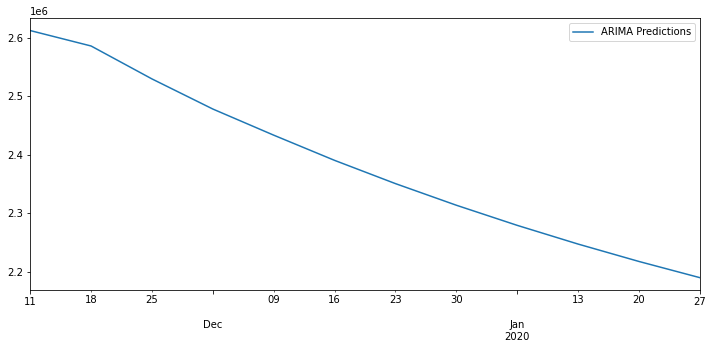

In [71]:
pred.plot(figsize = (12,5), legend = True)